### kaggleのtitanic dataの可視化及びモデル学習の為の前処理用notebook

In [2]:
#モジュールのインポート
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(); sns.set_palette('husl')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial Unicode MS'  # to use Japanese in plots
from pprint import pprint

In [56]:
df_train = pd.read_csv("../data/kaggle/titanic/train.csv",encoding="utf-8-sig")
df_test = pd.read_csv("../data/kaggle/titanic/test.csv",encoding="utf-8-sig")
df_gender_submission = pd.read_csv("../data/kaggle/titanic/gender_submission.csv",encoding="utf-8-sig")

In [57]:
df_train["data_type"] = "train"
df_test["data_type"] = "test"

In [62]:
df_test = df_test.merge(df_gender_submission, on=['PassengerId'])

In [63]:
df_all = pd.concat([df_train, df_test], axis =0).reset_index(drop=True)

In [64]:
#欠損値の確認
df_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
data_type         0
dtype: int64

### カラムの一覧
- PassengerId – 乗客識別ユニークID
- Survived – 生存フラグ（0=死亡、1=生存）
- Pclass – チケットクラス
- Name – 乗客の名前
- Sex – 性別（male=男性、female＝女性）
- Age – 年齢
- SibSp – タイタニックに同乗している兄弟/配偶者の数
- parch – タイタニックに同乗している親/子供の数
- ticket – チケット番号
- fare – 料金
- cabin – 客室番号
- Embarked – 出港地（タイタニックへ乗った港）

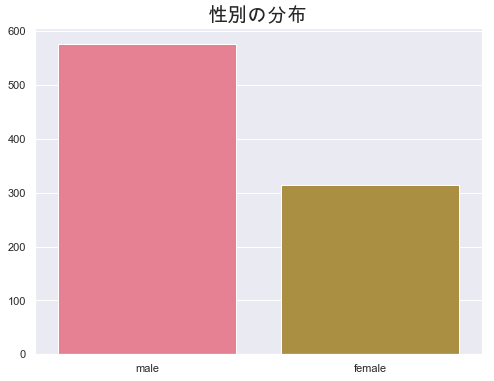

In [65]:
sex_counts = df_train['Sex'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('性別の分布', fontsize=20)
plt.show()

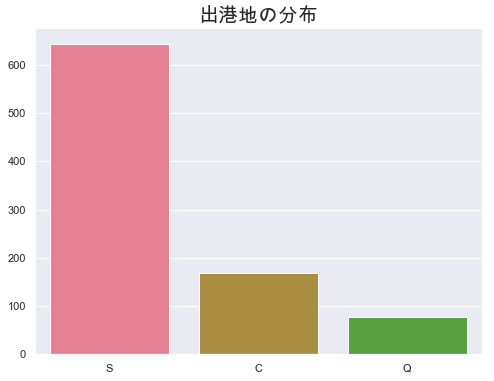

In [66]:
data_counts = df_train['Embarked'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title('出港地の分布', fontsize=20)
plt.show()

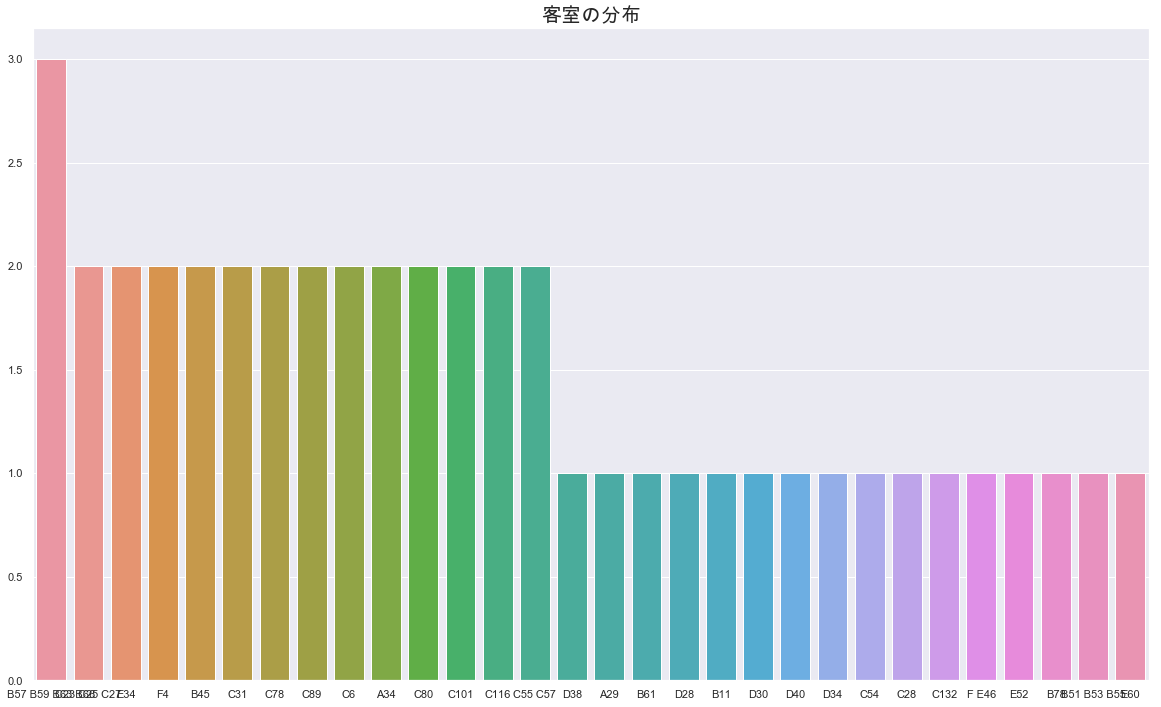

In [67]:
sex_counts = df_test['Cabin'].value_counts()[:30]
plt.figure(figsize=(20, 12))
sns.barplot(x=sex_counts.index, y=sex_counts.values)
plt.title('客室の分布', fontsize=20)
plt.show()

In [68]:
cabin_not_nan =df_train['Cabin'].dropna().index

In [69]:
df_train.iloc[cabin_not_nan]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_type
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,train
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,train
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,train
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,train
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,train
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,train
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,train
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,train


### 苗字を取得

In [70]:
df_all["surname"] = df_all["Name"].apply(lambda x:x.split(",")[0])

### 苗字のユニーク数をカウントして、可視化

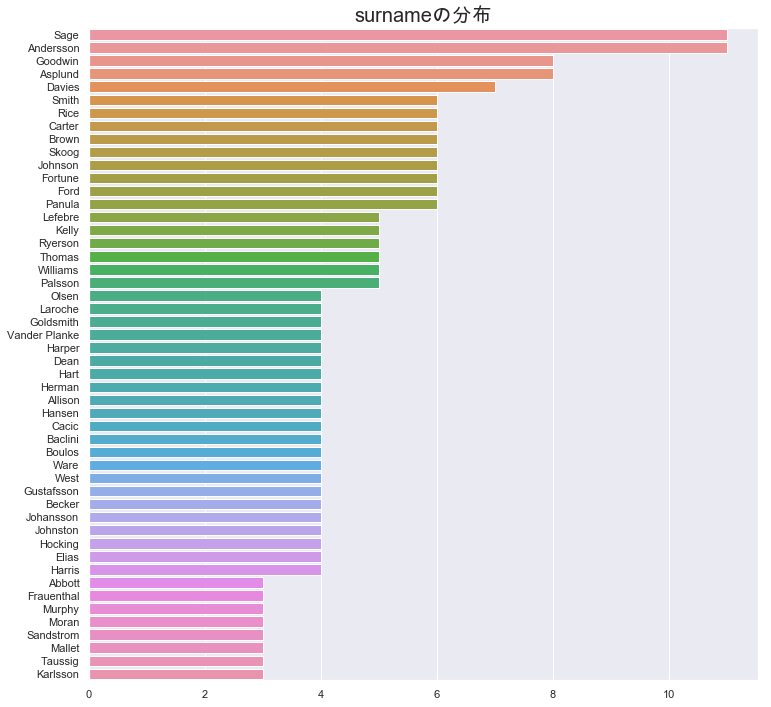

In [76]:
data_counts = df_all['surname'].value_counts()[:50]
plt.figure(figsize=(12, 12))
sns.barplot(x=data_counts.values, y=data_counts.index)
plt.title('surnameの分布', fontsize=20)
plt.show()

### 苗字を限定したデータでいくつか見てみる

In [77]:
df_all[df_all["surname"] == data_counts.index[0]]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,data_type,surname
159,NaN,NaN,S,69.55,"Sage, Master. Thomas Henry",2,160,3,male,8,0,CA. 2343,train,Sage
180,NaN,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,181,3,female,8,0,CA. 2343,train,Sage
201,NaN,NaN,S,69.55,"Sage, Mr. Frederick",2,202,3,male,8,0,CA. 2343,train,Sage
324,NaN,NaN,S,69.55,"Sage, Mr. George John Jr",2,325,3,male,8,0,CA. 2343,train,Sage
792,NaN,NaN,S,69.55,"Sage, Miss. Stella Anna",2,793,3,female,8,0,CA. 2343,train,Sage
846,NaN,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,847,3,male,8,0,CA. 2343,train,Sage
863,NaN,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,864,3,female,8,0,CA. 2343,train,Sage
1079,NaN,NaN,S,69.55,"Sage, Miss. Ada",2,1080,3,female,8,1,CA. 2343,test,Sage
1233,NaN,NaN,S,69.55,"Sage, Mr. John George",9,1234,3,male,1,0,CA. 2343,test,Sage
1251,14.5,NaN,S,69.55,"Sage, Master. William Henry",2,1252,3,male,8,0,CA. 2343,test,Sage


In [93]:
df_all[df_all["surname"] == data_counts.index[22]]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,data_type,surname
165,9.0,NaN,S,20.525,"Goldsmith, Master. Frank John William ""Frankie""",2,166,3,male,0,1,363291,train,Goldsmith
328,31.0,NaN,S,20.525,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",1,329,3,female,1,1,363291,train,Goldsmith
548,33.0,NaN,S,20.525,"Goldsmith, Mr. Frank John",1,549,3,male,1,0,363291,train,Goldsmith
933,41.0,NaN,S,7.850,"Goldsmith, Mr. Nathan",0,934,3,male,0,0,SOTON/O.Q. 3101263,test,Goldsmith


In [47]:
df_all[df_all["Ticket"] == data_counts.index[4]]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,surname
13,39.0,NaN,S,31.275,"Andersson, Mr. Anders Johan",5,14,3,male,1,0,347082,Andersson
119,2.0,NaN,S,31.275,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0,347082,Andersson
541,9.0,NaN,S,31.275,"Andersson, Miss. Ingeborg Constanzia",2,542,3,female,4,0,347082,Andersson
542,11.0,NaN,S,31.275,"Andersson, Miss. Sigrid Elisabeth",2,543,3,female,4,0,347082,Andersson
610,39.0,NaN,S,31.275,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",5,611,3,female,1,0,347082,Andersson
813,6.0,NaN,S,31.275,"Andersson, Miss. Ebba Iris Alfrida",2,814,3,female,4,0,347082,Andersson
850,4.0,NaN,S,31.275,"Andersson, Master. Sigvard Harald Elias",2,851,3,male,4,0,347082,Andersson


In [38]:
#parchが2→両親と乗っていると判断＝子供の可能性高い
df_all[(df_all["Parch"] == 2) & (df_all["SibSp"] > 2)]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,surname
27,19.0,C23 C25 C27,S,263.0000,"Fortune, Mr. Charles Alexander",2,28,1,male,3,0,19950,Fortune
59,11.0,NaN,S,46.9000,"Goodwin, Master. William Frederick",2,60,3,male,5,0,CA 2144,Goodwin
63,4.0,NaN,S,27.9000,"Skoog, Master. Harald",2,64,3,male,3,0,347088,Skoog
68,17.0,NaN,S,7.9250,"Andersson, Miss. Erna Alexandra",2,69,3,female,4,1,3101281,Andersson
71,16.0,NaN,S,46.9000,"Goodwin, Miss. Lillian Amy",2,72,3,female,5,0,CA 2144,Goodwin
88,23.0,C23 C25 C27,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1,19950,Fortune
119,2.0,NaN,S,31.2750,"Andersson, Miss. Ellis Anna Maria",2,120,3,female,4,0,347082,Andersson
159,NaN,NaN,S,69.5500,"Sage, Master. Thomas Henry",2,160,3,male,8,0,CA. 2343,Sage
180,NaN,NaN,S,69.5500,"Sage, Miss. Constance Gladys",2,181,3,female,8,0,CA. 2343,Sage
182,9.0,NaN,S,31.3875,"Asplund, Master. Clarence Gustaf Hugo",2,183,3,male,4,0,347077,Asplund


In [31]:
#苗字、性別、出港地をカテゴリ変数化
cols = ["surname", "Sex","Embarked"]
df_all_to_cat = pd.get_dummies(df_all, columns=cols)
print(df_all_to_cat.shape)

(1309, 890)


In [32]:
#苗字のうち、ユニーク数が1のものを除く
data_counts = df_all['surname'].value_counts()
surname_to_drop = data_counts[data_counts < 3].index.tolist()

to_drop_list = []
target_col = "surname"

for each_data in surname_to_drop:
    col_name = "{}_{}".format(target_col,each_data)
    to_drop_list.append(col_name)
    
df_all_to_cat.drop(columns=to_drop_list, inplace=True)

In [33]:
#その他、不要なカラムを削除
to_drop = ["PassengerId","Name","Ticket","Cabin"]

df_all_to_cat.drop(columns=to_drop, inplace=True)
print(df_all_to_cat.shape)

(1309, 116)


In [34]:
#年齢の欠損値を平均で埋める
df_all_to_cat['Age'].fillna(df_all_to_cat['Age'].mode()[0], inplace=True)

In [46]:
#説明変数と目的変数に分離
y_all = df_train_surname_to_cat.iloc[:,0].values
x_all = df_train_surname_to_cat.iloc[:,1:].values